# NumPy · pandas · Matplotlib · Seaborn 기초 실습

데이터 분석의 필수 Python 라이브러리 네 가지—NumPy, pandas, Matplotlib, Seaborn—의 가장 핵심적인 기능을 **실습 위주**로 소개합니다.

## 강의 목표
- Python 환경(Jupyter Notebook)에서 데이터를 다루는 기본 능력 습득
- NumPy를 사용하여 다차원 배열 생성·연산 이해
- pandas를 통해 표 형태의 데이터를 불러오고(DataFrame), 선택·집계·가공 실습
- Matplotlib로 데이터 시각화 기초 플롯 작성
- Seaborn으로 데이터 시각화 기초 플롯 작성

In [ ]:
!pip install numpy pandas matplotlib seaborn
!apt-get install -y fonts-nanum*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import matplotlib.font_manager as fm
import matplotlib as mpl

#한글이 보이도록 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(font_path)
font_prop = fm.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()

# seaborn 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'

### Jupyter 기본 단축키
- **셀 실행**: `Shift + Enter`
- **새 셀 추가**: `B`(아래) 또는 `A`(위)
- **코드 ↔︎ 마크다운 전환**: `Y` / `M`

## 1. NumPy 기초

In [3]:
# ndarray 생성 & 속성 확인
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)
print('shape:', arr.shape, 'dtype:', arr.dtype)

[[1 2 3]
 [4 5 6]]
shape: (2, 3) dtype: int64


**연습 1‑1**: 0~9까지 짝수만 포함하는 1‑차원 배열을 만들어 `dtype`을 확인해 보세요.

In [4]:
even = np.arange(0, 10, 2)
even, even.dtype

(array([0, 2, 4, 6, 8]), dtype('int64'))

In [5]:
arr2 = np.arange(1, 10).reshape(3, 3)
arr2 + 10

array([[11, 12, 13],
       [14, 15, 16],
       [17, 18, 19]])

## 2. pandas 기초

In [6]:
# Series & DataFrame
s = pd.Series([10, 15, 7], index=['서울', '부산', '대구'])
df = pd.DataFrame({
    'name': ['Ann', 'Bob', 'Ceci'],
    'age': [23, 25, 22],
    'major': ['Korean', 'Economics', 'Physics']
})

In [7]:
print(s)

서울    10
부산    15
대구     7
dtype: int64


In [8]:
df.head()

,name,age,major
0,Ann,23,Korean
1,Bob,25,Economics
2,Ceci,22,Physics


In [9]:
#`age` 컬럼의 평균을 구하기
df['age'].mean()

np.float64(23.333333333333332)

#### iris 데이터셋 조작하기

다양한 방법으로 데이터를 선택하고 조작


In [10]:
# CSV 읽기 예시 (인터넷 필요)
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [11]:
# 1. 특정 열만 선택하기
print("sepal_length 열만 선택:")
print(iris['sepal_length'].head())

print("\n여러 열 선택:")
selected_cols = iris[['sepal_length', 'species']]
print(selected_cols.head())


sepal_length 열만 선택:
0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

여러 열 선택:
   sepal_length species
0           5.1  setosa
1           4.9  setosa
2           4.7  setosa
3           4.6  setosa
4           5.0  setosa


In [12]:
# 2. 특정 열 삭제하기 (원본은 유지)
print("petal_width 열을 제외한 데이터:")
iris_no_petal_width = iris.drop('petal_width', axis=1)
print(iris_no_petal_width.head())

print("\n여러 열 삭제:")
iris_minimal = iris.drop(['petal_length', 'petal_width'], axis=1)
print(iris_minimal.head())


petal_width 열을 제외한 데이터:
   sepal_length  sepal_width  petal_length species
0           5.1          3.5           1.4  setosa
1           4.9          3.0           1.4  setosa
2           4.7          3.2           1.3  setosa
3           4.6          3.1           1.5  setosa
4           5.0          3.6           1.4  setosa

여러 열 삭제:
   sepal_length  sepal_width species
0           5.1          3.5  setosa
1           4.9          3.0  setosa
2           4.7          3.2  setosa
3           4.6          3.1  setosa
4           5.0          3.6  setosa


In [13]:
# 3. 조건부 행 선택 (필터링)
print("sepal_length가 5.0보다 큰 행들:")
large_sepals = iris[iris['sepal_length'] > 5.0]
print(f"전체 {len(iris)}개 중 {len(large_sepals)}개 행이 조건을 만족")
print(large_sepals.head())

print("\nsetosa 종만 선택:")
setosa_only = iris[iris['species'] == 'setosa']
print(f"setosa 종은 총 {len(setosa_only)}개")
print(setosa_only.head())


sepal_length가 5.0보다 큰 행들:
전체 150개 중 118개 행이 조건을 만족
    sepal_length  sepal_width  petal_length  petal_width species
0            5.1          3.5           1.4          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
10           5.4          3.7           1.5          0.2  setosa
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa

setosa 종만 선택:
setosa 종은 총 50개
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [14]:
# 4. 복합 조건으로 필터링
print("sepal_length > 6.0 AND species == 'virginica':")
complex_filter = iris[(iris['sepal_length'] > 6.0) & (iris['species'] == 'virginica')]
print(f"조건을 만족하는 행: {len(complex_filter)}개")
print(complex_filter.head())

print("\nsetosa 또는 versicolor 종:")
two_species = iris[iris['species'].isin(['setosa', 'versicolor'])]
print(f"setosa + versicolor: {len(two_species)}개")
print(two_species['species'].value_counts())


sepal_length > 6.0 AND species == 'virginica':
조건을 만족하는 행: 41개
     sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica
105           7.6          3.0           6.6          2.1  virginica

setosa 또는 versicolor 종:
setosa + versicolor: 100개
species
setosa        50
versicolor    50
Name: count, dtype: int64


In [15]:
# 5. 기본 통계 정보 확인
print("데이터셋 기본 정보:")
print(f"형태: {iris.shape}")
print(f"컬럼명: {list(iris.columns)}")

print("\n수치형 컬럼의 기본 통계:")
print(iris.describe())

print("\n각 종의 개수:")
print(iris['species'].value_counts())


데이터셋 기본 정보:
형태: (150, 5)
컬럼명: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

수치형 컬럼의 기본 통계:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

각 종의 개수:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [16]:
# 7. 그룹별 집계
print("종별 평균값:")
species_mean = iris.groupby('species').mean()
print(species_mean)

print("\n종별 sepal_length의 최대값과 최소값:")
species_stats = iris.groupby('species')['sepal_length'].agg(['min', 'max', 'mean'])
print(species_stats)


종별 평균값:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.428         1.462        0.246
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

종별 sepal_length의 최대값과 최소값:
            min  max   mean
species                    
setosa      4.3  5.8  5.006
versicolor  4.9  7.0  5.936
virginica   4.9  7.9  6.588


In [17]:
# 6. 데이터 정렬
print("sepal_length를 기준으로 내림차순 정렬:")
sorted_iris = iris.sort_values('sepal_length', ascending=False)
print(sorted_iris.head())

print("\n여러 컬럼으로 정렬 (species 오름차순, sepal_length 내림차순):")
multi_sorted = iris.sort_values(['species', 'sepal_length'], ascending=[True, False])
print(multi_sorted.head(10))


sepal_length를 기준으로 내림차순 정렬:
     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
118           7.7          2.6           6.9          2.3  virginica
117           7.7          3.8           6.7          2.2  virginica
135           7.7          3.0           6.1          2.3  virginica

여러 컬럼으로 정렬 (species 오름차순, sepal_length 내림차순):
    sepal_length  sepal_width  petal_length  petal_width species
14           5.8          4.0           1.2          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa
18           5.7          3.8           1.7          0.3  setosa
33           5.5          4.2           1.4          0.2  setosa
36           5.5          3.5           1.3          0.2  setosa
5            5.4          3.9           1.7          0.4  setosa
10           5.4          3.7           1.5          0.2

In [ ]:
# 여기에 코드를 작성해보세요
# 힌트: 조건 필터링 -> 컬럼 선택 -> 정렬 순서로 진행



In [18]:
# 정답 예시
result = iris[iris['petal_length'] >= 4.0][['sepal_width', 'petal_length']].sort_values('petal_length', ascending=False)
print("결과:")
print(result.head(10))


결과:
     sepal_width  petal_length
118          2.6           6.9
117          3.8           6.7
122          2.8           6.7
105          3.0           6.6
131          3.8           6.4
107          2.9           6.3
130          2.8           6.1
109          3.6           6.1
135          3.0           6.1
100          3.3           6.0


## 3. Matplotlib 기초

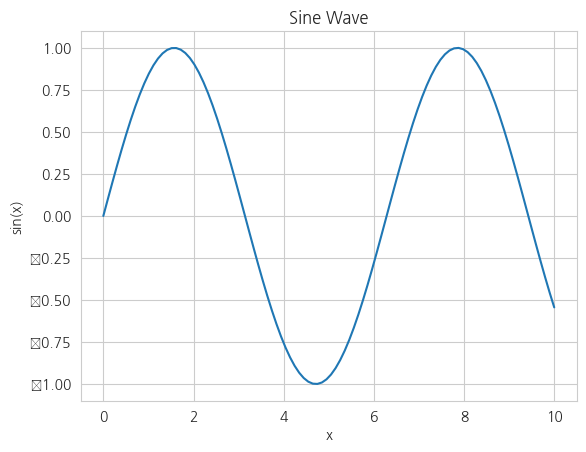

In [20]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x))
plt.title('Sine Wave')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

**연습 3‑1**: iris 데이터셋으로 다양한 그래프 그리기

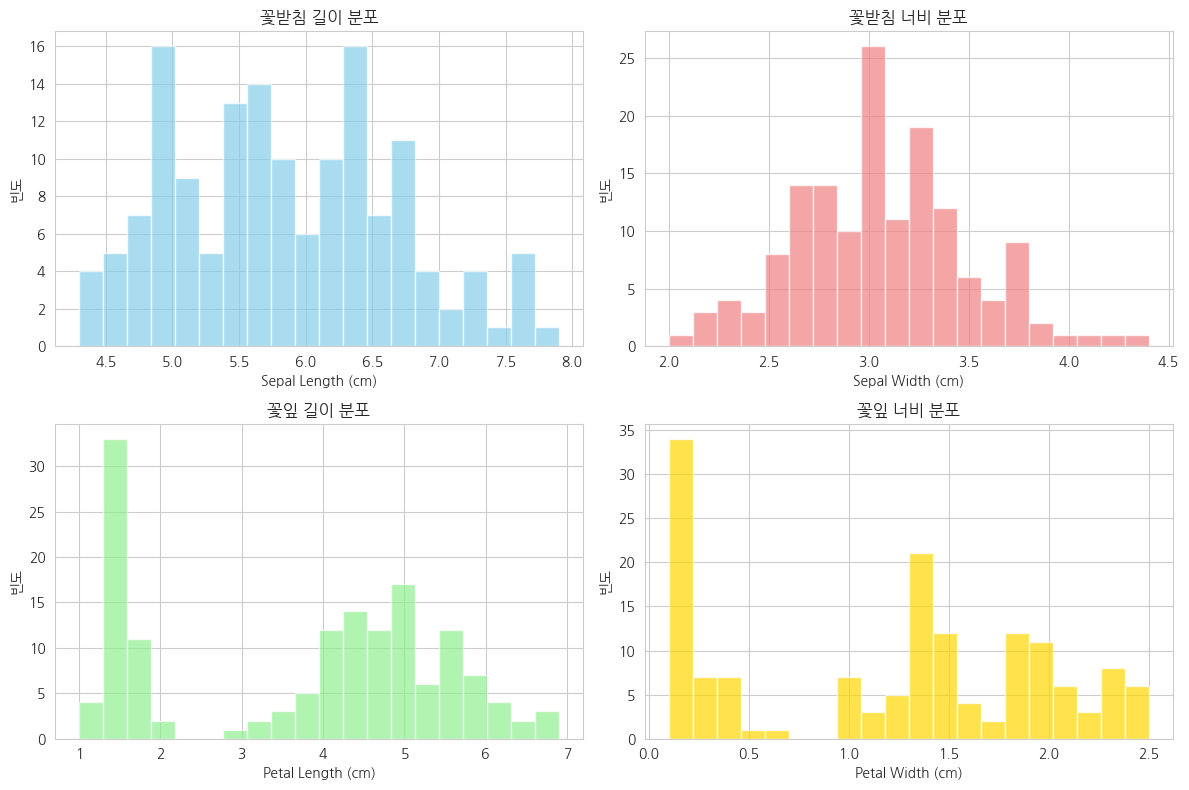

In [21]:
# 1. 히스토그램 - 각 특성의 분포 확인
plt.figure(figsize=(12, 8))

# 2x2 서브플롯 생성
plt.subplot(2, 2, 1)
plt.hist(iris['sepal_length'], bins=20, alpha=0.7, color='skyblue')
plt.title('꽃받침 길이 분포')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('빈도')

plt.subplot(2, 2, 2)
plt.hist(iris['sepal_width'], bins=20, alpha=0.7, color='lightcoral')
plt.title('꽃받침 너비 분포')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('빈도')

plt.subplot(2, 2, 3)
plt.hist(iris['petal_length'], bins=20, alpha=0.7, color='lightgreen')
plt.title('꽃잎 길이 분포')
plt.xlabel('Petal Length (cm)')
plt.ylabel('빈도')

plt.subplot(2, 2, 4)
plt.hist(iris['petal_width'], bins=20, alpha=0.7, color='gold')
plt.title('꽃잎 너비 분포')
plt.xlabel('Petal Width (cm)')
plt.ylabel('빈도')

plt.tight_layout()
plt.show()


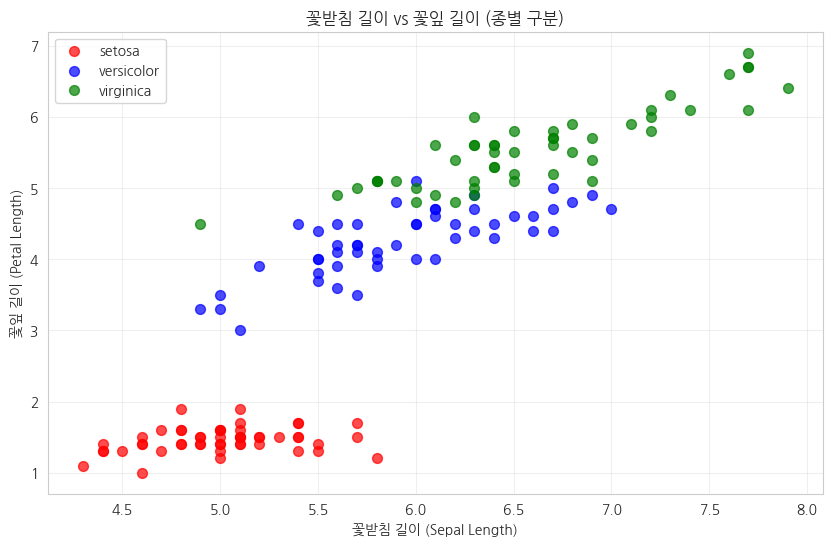

In [22]:
# 2. 산점도 - 두 변수 간의 관계
plt.figure(figsize=(10, 6))

# 종별로 다른 색상 지정
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

for species in iris['species'].unique():
    species_data = iris[iris['species'] == species]
    plt.scatter(species_data['sepal_length'], species_data['petal_length'],
                c=colors[species], label=species, alpha=0.7, s=50)

plt.xlabel('꽃받침 길이 (Sepal Length)')
plt.ylabel('꽃잎 길이 (Petal Length)')
plt.title('꽃받침 길이 vs 꽃잎 길이 (종별 구분)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-23-3810036442.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([setosa_data, versicolor_data, virginica_data],
/tmp/ipython-input-23-3810036442.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([setosa_data, versicolor_data, virginica_data],
/tmp/ipython-input-23-3810036442.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([setosa_data, versicolor_data, virginica_data],
/tmp/ipython-input-23-3810036442.py:17: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name wil

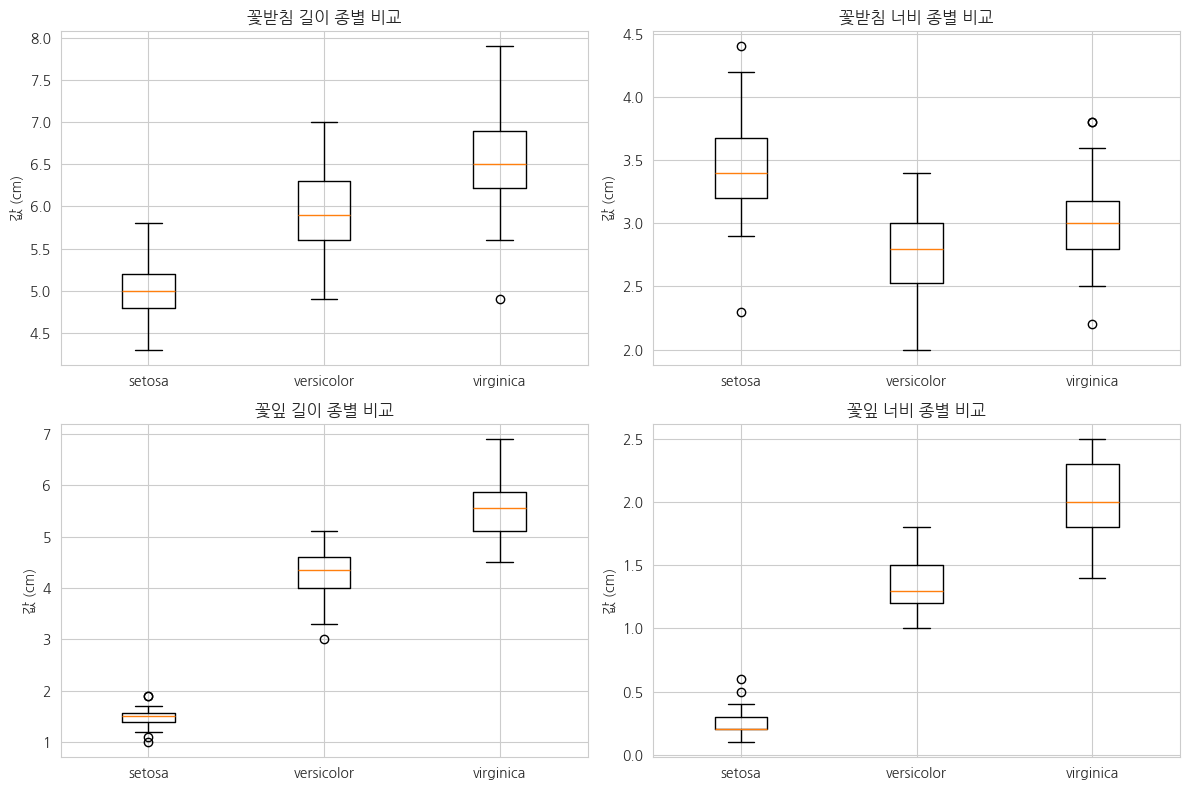

In [23]:
# 3. 박스플롯 - 종별 특성 비교
plt.figure(figsize=(12, 8))

# 각 특성별로 종별 박스플롯
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_names = ['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비']

for i, (feature, name) in enumerate(zip(features, feature_names)):
    plt.subplot(2, 2, i+1)

    # 종별 데이터 준비
    setosa_data = iris[iris['species'] == 'setosa'][feature]
    versicolor_data = iris[iris['species'] == 'versicolor'][feature]
    virginica_data = iris[iris['species'] == 'virginica'][feature]

    # 박스플롯 그리기
    plt.boxplot([setosa_data, versicolor_data, virginica_data],
                labels=['setosa', 'versicolor', 'virginica'])
    plt.title(f'{name} 종별 비교')
    plt.ylabel('값 (cm)')

plt.tight_layout()
plt.show()


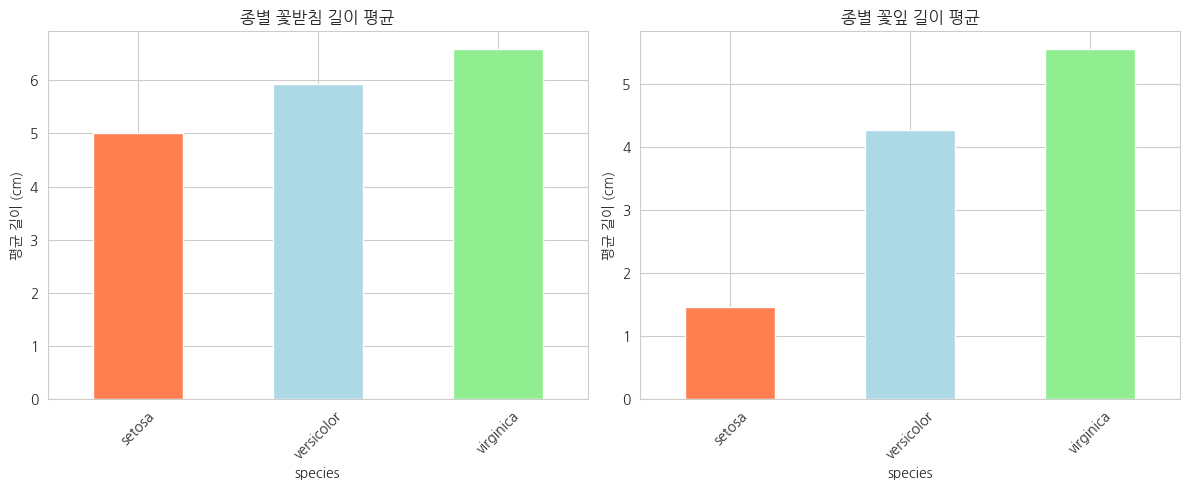

In [24]:
# 4. 막대그래프 - 종별 평균값 비교
plt.figure(figsize=(12, 5))

# 종별 평균 계산
species_mean = iris.groupby('species')[['sepal_length', 'petal_length']].mean()

plt.subplot(1, 2, 1)
species_mean['sepal_length'].plot(kind='bar', color=['coral', 'lightblue', 'lightgreen'])
plt.title('종별 꽃받침 길이 평균')
plt.ylabel('평균 길이 (cm)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
species_mean['petal_length'].plot(kind='bar', color=['coral', 'lightblue', 'lightgreen'])
plt.title('종별 꽃잎 길이 평균')
plt.ylabel('평균 길이 (cm)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


/tmp/ipython-input-25-3028970879.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([setosa, versicolor, virginica],


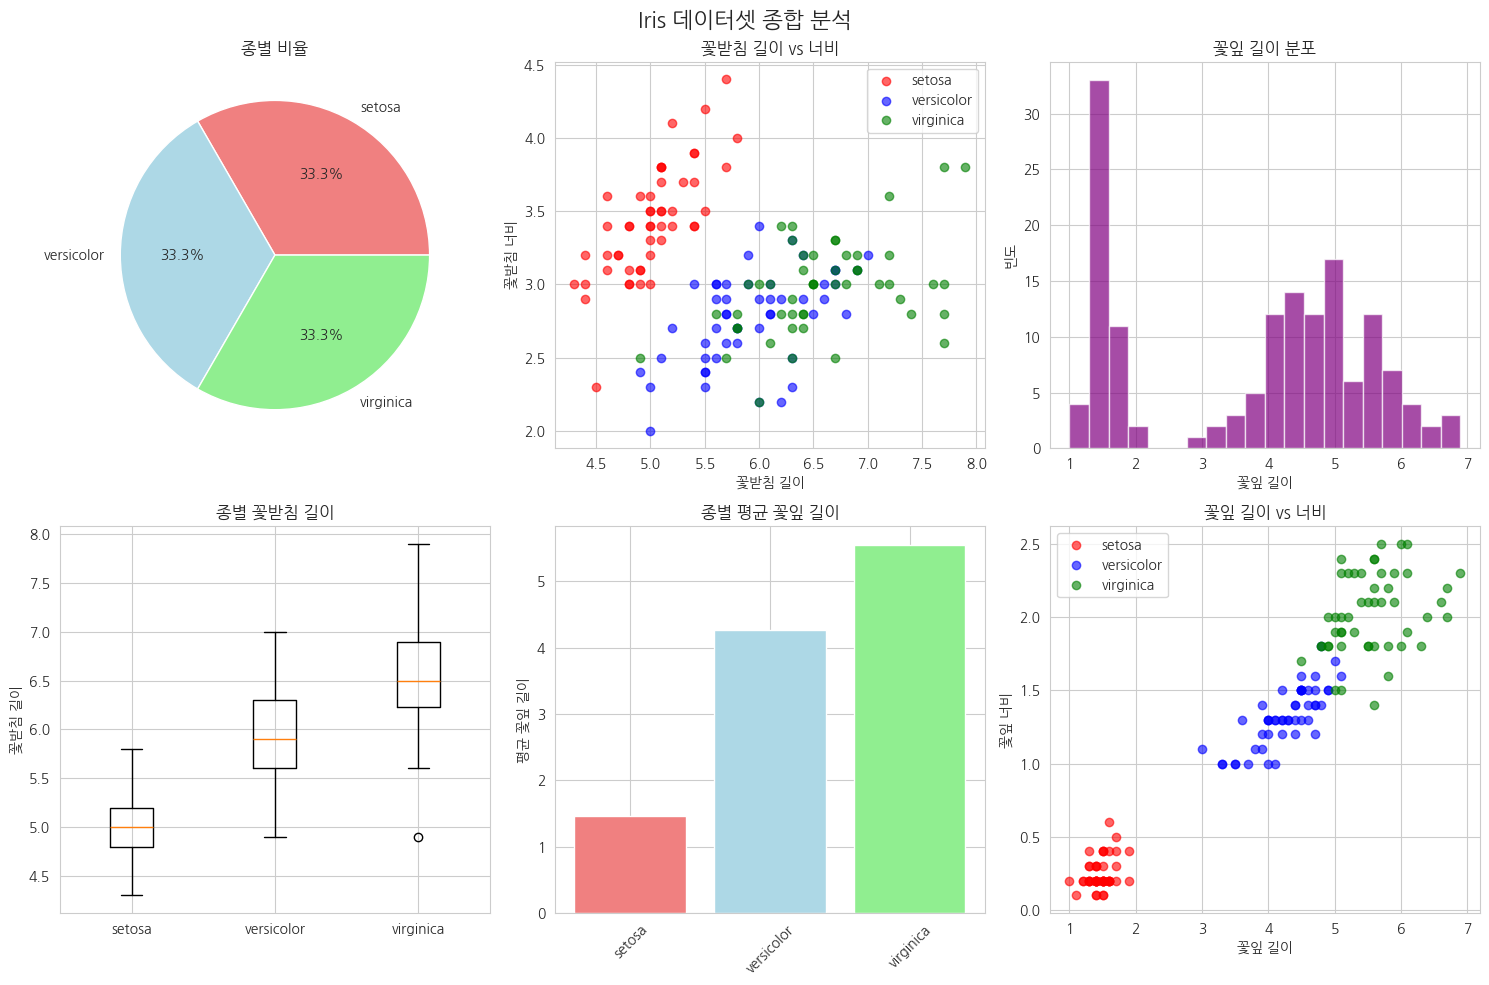

In [25]:
# 6. 종합 대시보드 - 한 화면에 여러 그래프
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Iris 데이터셋 종합 분석', fontsize=16)

# 1. 종별 개수 파이차트
species_counts = iris['species'].value_counts()
axes[0, 0].pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%',
               colors=['lightcoral', 'lightblue', 'lightgreen'])
axes[0, 0].set_title('종별 비율')

# 2. 꽃받침 길이 vs 너비 산점도
for species, color in zip(iris['species'].unique(), ['red', 'blue', 'green']):
    species_data = iris[iris['species'] == species]
    axes[0, 1].scatter(species_data['sepal_length'], species_data['sepal_width'],
                      c=color, label=species, alpha=0.6)
axes[0, 1].set_xlabel('꽃받침 길이')
axes[0, 1].set_ylabel('꽃받침 너비')
axes[0, 1].set_title('꽃받침 길이 vs 너비')
axes[0, 1].legend()

# 3. 꽃잎 길이 히스토그램
axes[0, 2].hist(iris['petal_length'], bins=20, alpha=0.7, color='purple')
axes[0, 2].set_xlabel('꽃잎 길이')
axes[0, 2].set_ylabel('빈도')
axes[0, 2].set_title('꽃잎 길이 분포')

# 4. 종별 꽃받침 길이 박스플롯
setosa = iris[iris['species'] == 'setosa']['sepal_length']
versicolor = iris[iris['species'] == 'versicolor']['sepal_length']
virginica = iris[iris['species'] == 'virginica']['sepal_length']
axes[1, 0].boxplot([setosa, versicolor, virginica],
                   labels=['setosa', 'versicolor', 'virginica'])
axes[1, 0].set_ylabel('꽃받침 길이')
axes[1, 0].set_title('종별 꽃받침 길이')

# 5. 종별 평균값 막대그래프
species_avg = iris.groupby('species')['petal_length'].mean()
axes[1, 1].bar(species_avg.index, species_avg.values,
               color=['lightcoral', 'lightblue', 'lightgreen'])
axes[1, 1].set_ylabel('평균 꽃잎 길이')
axes[1, 1].set_title('종별 평균 꽃잎 길이')
axes[1, 1].tick_params(axis='x', rotation=45)

# 6. 꽃잎 길이 vs 너비 산점도
for species, color in zip(iris['species'].unique(), ['red', 'blue', 'green']):
    species_data = iris[iris['species'] == species]
    axes[1, 2].scatter(species_data['petal_length'], species_data['petal_width'],
                      c=color, label=species, alpha=0.6)
axes[1, 2].set_xlabel('꽃잎 길이')
axes[1, 2].set_ylabel('꽃잎 너비')
axes[1, 2].set_title('꽃잎 길이 vs 너비')
axes[1, 2].legend()

plt.tight_layout()
plt.show()


## 4. Seaborn 기초

Seaborn은 matplotlib을 기반으로 한 통계 시각화 라이브러리입니다. 더 아름답고 통계적으로 유용한 그래프를 쉽게 만들 수 있습니다.


모든 특성 간의 관계를 한 번에 시각화:


<Figure size 1200x1000 with 0 Axes>

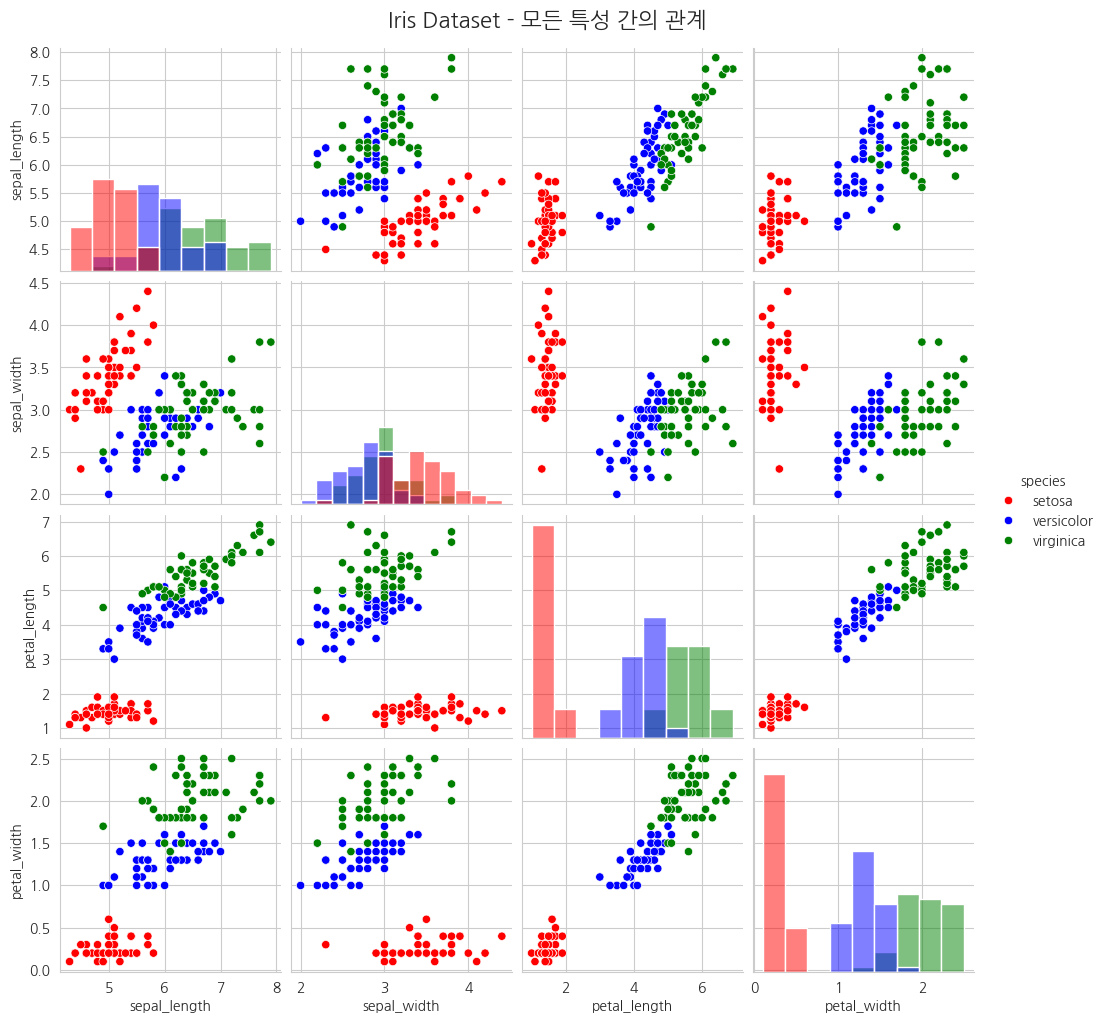

In [26]:
# 1. Pairplot - 모든 변수 간의 관계를 한 번에 보기
print("모든 특성 간의 관계를 한 번에 시각화:")
plt.figure(figsize=(12, 10))

# 종별로 다른 색상으로 pairplot 생성
g = sns.pairplot(iris, hue='species', diag_kind='hist',
                 palette=['red', 'blue', 'green'])
g.fig.suptitle('Iris Dataset - 모든 특성 간의 관계', y=1.02, fontsize=16)
plt.show()


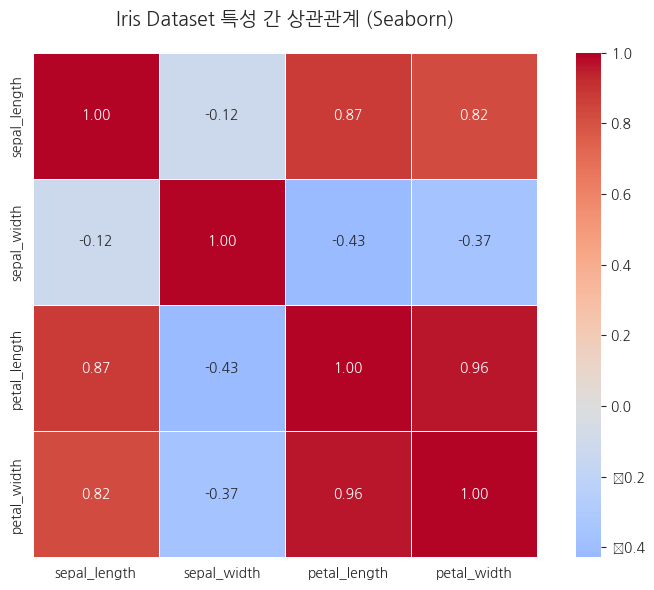

In [27]:
# 2. Heatmap - 상관관계를 더 예쁘게 시각화
plt.figure(figsize=(8, 6))

# 수치형 데이터만 선택하여 상관계수 계산
numeric_data = iris.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

# seaborn으로 더 예쁜 히트맵 생성
sns.heatmap(correlation_matrix,
            annot=True,          # 상관계수 값 표시
            cmap='coolwarm',     # 색상 맵
            center=0,            # 0을 중심으로 색상 조정
            square=True,         # 정사각형 셀
            linewidths=0.5,      # 셀 사이 선
            fmt='.2f')           # 소수점 둘째 자리까지

plt.title('Iris Dataset 특성 간 상관관계 (Seaborn)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


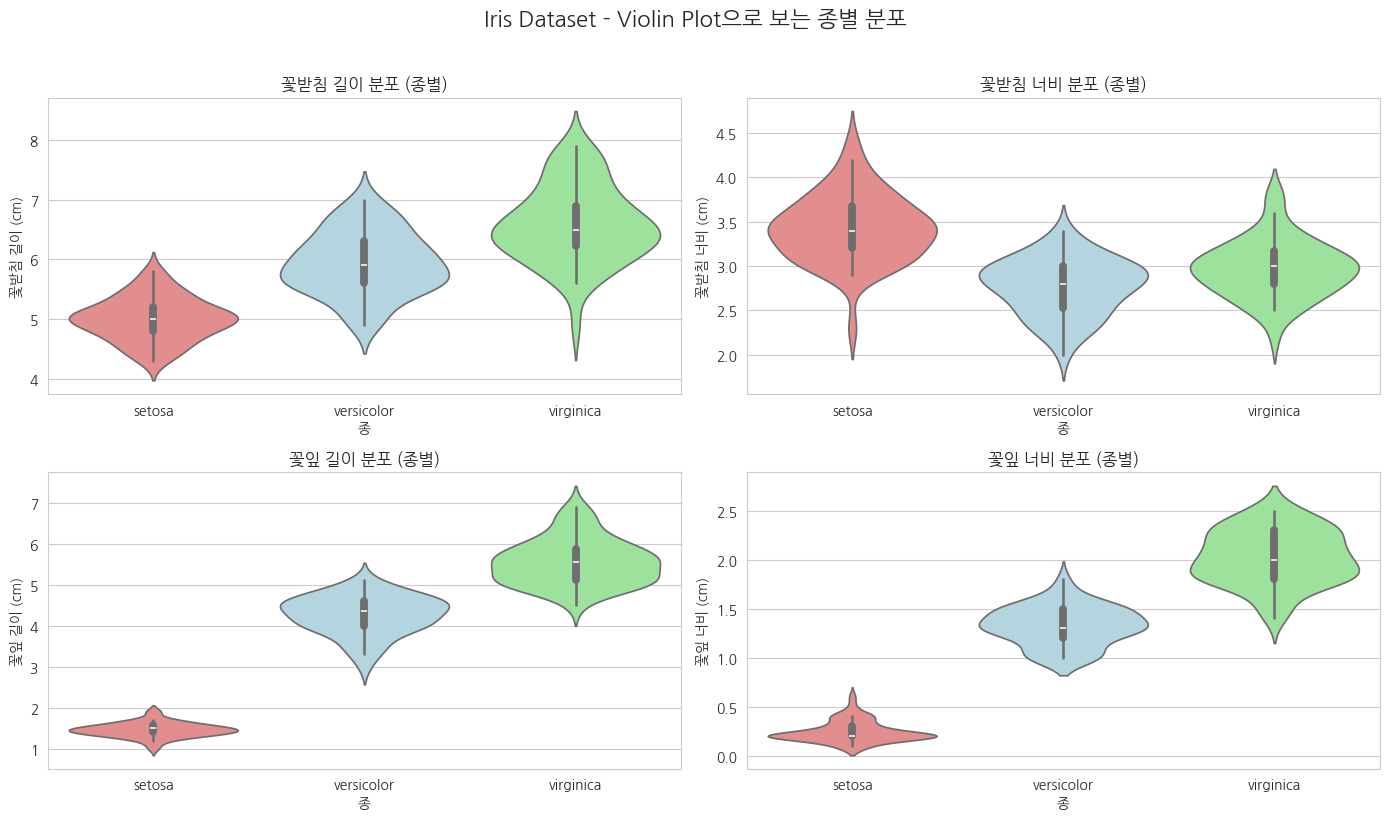

In [28]:
# 3. Violin Plot - 분포 형태와 밀도를 함께 보기
plt.figure(figsize=(14, 8))

# 각 특성별로 종별 violin plot
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
feature_names = ['꽃받침 길이', '꽃받침 너비', '꽃잎 길이', '꽃잎 너비']

for i, (feature, name) in enumerate(zip(features, feature_names)):
    plt.subplot(2, 2, i+1)

    # violin plot 생성
    sns.violinplot(data=iris, x='species', y=feature,
                   palette=['lightcoral', 'lightblue', 'lightgreen'])

    plt.title(f'{name} 분포 (종별)', fontsize=12)
    plt.xlabel('종')
    plt.ylabel(f'{name} (cm)')

plt.suptitle('Iris Dataset - Violin Plot으로 보는 종별 분포', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


## 요약

이번 실습에서 배운 내용:

### NumPy
- 다차원 배열 생성 및 조작
- 브로드캐스팅을 통한 벡터화 연산

### pandas
- DataFrame과 Series 생성 및 조작
- 데이터 선택, 필터링, 정렬, 집계
- CSV 파일 읽기 및 기본 통계 분석

### Matplotlib
- 히스토그램, 산점도, 박스플롯, 막대그래프
- 서브플롯을 활용한 다중 그래프
- 상관관계 히트맵
- 종합 대시보드 구성

### Seaborn
- Pairplot을 통한 모든 변수 관계 시각화
- Violin plot으로 분포 형태와 밀도 표현

